In [22]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("task_3_dataset.csv", sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [23]:
df.shape

(45211, 17)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [24]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [25]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [26]:
total_visitors = len(df)
total_leads = df[df['campaign'] > 1].shape[0]
total_customers = df[df['y'] == 'yes'].shape[0]

print("Visitors:", total_visitors)
print("Leads:", total_leads)
print("Customers:", total_customers)

Visitors: 45211
Leads: 27667
Customers: 5289


In [27]:
visitor_to_lead = (total_leads / total_visitors) * 100
lead_to_customer = (total_customers / total_leads) * 100
overall_conversion = (total_customers / total_visitors) * 100

print(f"Visitor → Lead Conversion: {visitor_to_lead:.2f}%")
print(f"Lead → Customer Conversion: {lead_to_customer:.2f}%")
print(f"Overall Funnel Conversion: {overall_conversion:.2f}%")

Visitor → Lead Conversion: 61.20%
Lead → Customer Conversion: 19.12%
Overall Funnel Conversion: 11.70%


In [28]:
drop_v_to_l = total_visitors - total_leads
drop_l_to_c = total_leads - total_customers

print("Drop-off (Visitors → Leads):", drop_v_to_l)
print("Drop-off (Leads → Customers):", drop_l_to_c)

Drop-off (Visitors → Leads): 17544
Drop-off (Leads → Customers): 22378


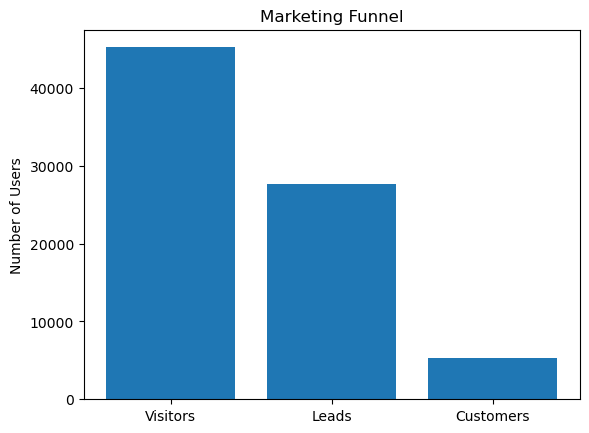

In [29]:
stages = ['Visitors', 'Leads', 'Customers']
values = [total_visitors, total_leads, total_customers]

plt.figure()
plt.bar(stages, values)
plt.title("Marketing Funnel")
plt.ylabel("Number of Users")
plt.show()

In [30]:
channel_perf = df.groupby('contact')['y'].value_counts(normalize=True).unstack()
channel_perf['yes'] = channel_perf['yes'] * 100

channel_perf.sort_values(by='yes', ascending=False)

y,no,yes
contact,,
cellular,0.850811,14.918900
telephone,0.865795,13.420509
unknown,0.959293,4.070661


In [31]:
campaign_perf = df.groupby('campaign')['y'].value_counts(normalize=True).unstack()
campaign_perf['yes'] = campaign_perf['yes'] * 100

campaign_perf.sort_values(by='yes', ascending=False).head(10)

y,no,yes
campaign,,
1,0.854024,14.597583
2,0.887965,11.203519
3,0.888064,11.193624
32,0.888889,11.111111
4,0.909994,9.000568
17,0.913043,8.695652
11,0.920398,7.960199
5,0.921202,7.879819
6,0.928737,7.126259


In [32]:
month_perf = df.groupby('month')['y'].value_counts(normalize=True).unstack()
month_perf['yes'] = month_perf['yes'] * 100

month_perf.sort_values(by='yes', ascending=False)

y,no,yes
month,,
mar,0.480084,51.991614
dec,0.532710,46.728972
sep,0.535406,46.459413
oct,0.562331,43.766938
apr,0.803206,19.679400
feb,0.833522,16.647792
aug,0.889867,11.013286
jun,0.897772,10.222805
nov,0.898489,10.151134


In [33]:
poutcome_perf = df.groupby('poutcome')['y'].value_counts(normalize=True).unstack()
poutcome_perf['yes'] = poutcome_perf['yes'] * 100

poutcome_perf.sort_values(by='yes', ascending=False)

y,no,yes
poutcome,,
success,0.352747,64.725347
other,0.833152,16.684783
failure,0.873903,12.609671
unknown,0.908385,9.161503


In [34]:
summary = pd.DataFrame({
    "Stage": ["Visitors", "Leads", "Customers"],
    "Count": [total_visitors, total_leads, total_customers],
    "Conversion (%)": [100, visitor_to_lead, lead_to_customer]
})

summary

,Stage,Count,Conversion (%)
0,Visitors,45211,100.000000
1,Leads,27667,61.195284
2,Customers,5289,19.116637
